In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
Comparison = pd.read_csv("Output Data/Comparison.csv")

In [3]:
Comparison = Comparison[Comparison["Distance"]<3.5]

In [4]:
#a = Comparison[Comparison["Track Length (CME)"]==Comparison["Track Length (Dino)"] and Comparison["ID (CME)"]]
d = Comparison["ID (CME)"].unique()


In [5]:
M_comp = Comparison.to_numpy()
ID_vec = defaultdict(list)

for ID in M_comp:
    ID_vec[ID[0]].append(ID)

for ID_val in ID_vec:
    ID_vec[ID_val] = np.array(ID_vec[ID_val]) 

ID_list = np.zeros((len(ID_vec),5), dtype=object)

In [6]:
for i, ID in enumerate(ID_vec):
    ID_val = ID_vec[ID]
    CME_ID = np.unique(ID_val[:,0])
    Dino_IDs = np.unique(ID_val[:,1])
    TL_CME = np.unique(ID_val[:,13])
    TL_Dino = np.unique(ID_val[:,14])

    ID_list[i][0] = CME_ID
    ID_list[i][1] = Dino_IDs
    ID_list[i][2] = TL_CME
    ID_list[i][3] = TL_Dino
    
    if len(Dino_IDs) == 1 and TL_CME == TL_Dino:
        ID_list[i][4] = True
    else:
        ID_list[i][4] = False

In [7]:
Sum = pd.DataFrame(ID_list, columns = ["ID (CME)","ID (Dino)", "Track Length (CME)", "Track Length (Dino)", "True Match"])
Sum

,ID (CME),ID (Dino),Track Length (CME),Track Length (Dino),True Match
0,[1.0],"[360.0, 28476.0]",[99.0],"[29.0, 71.0]",False
1,[2.0],"[384.0, 14748.0, 35419.0, 35868.0]",[99.0],"[3.0, 5.0, 8.0, 90.0]",False
2,[3.0],"[395.0, 22517.0, 22998.0, 24067.0, 24633.0, 24...",[99.0],"[3.0, 9.0, 17.0, 34.0, 61.0]",False
3,[4.0],"[433.0, 6114.0, 31440.0]",[99.0],"[3.0, 21.0, 82.0]",False
4,[5.0],"[459.0, 24091.0, 25908.0, 35629.0]",[99.0],"[3.0, 8.0, 21.0, 67.0]",False
...,...,...,...,...,...
4101,[6287.0],[36181.0],[2.0],[3.0],False
4102,[6294.0],[20567.0],[2.0],[37.0],False
4103,[6295.0],[23811.0],[2.0],[27.0],False
4104,[6296.0],[35968.0],[2.0],[4.0],False


In [8]:
track_lengths = np.array([row[2][0] for row in ID_list])
mask_true = np.array([row[4] for row in ID_list])
bins = np.arange(0, 110, 10)

counts, _ = np.histogram(track_lengths, bins)

counts_true, _ = np.histogram(track_lengths[mask_true], bins)

labels = np.array(("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"))

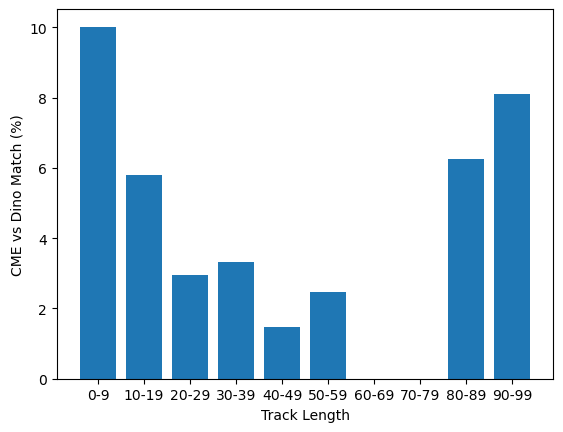

In [9]:
plt.bar(labels,100*counts_true/counts)
plt.xlabel("Track Length")
plt.ylabel("CME vs Dino Match (%)")
plt.show()

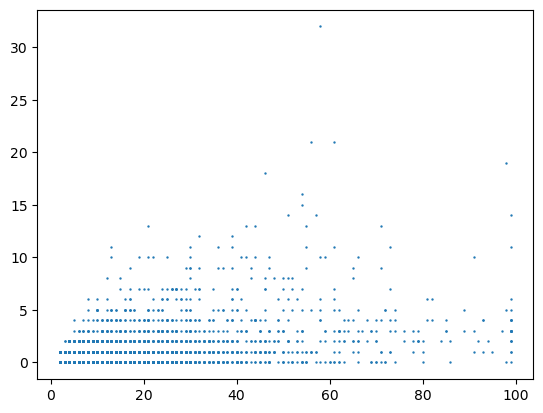

In [10]:
selected = ID_list[ID_list[:, 4] == False]
breaks = np.array([len(x) for x in selected[:,1]])-1
plt.scatter(selected[:,2],breaks, s = 0.5)
plt.show()

